In [4]:
from IPython.display import display, Image

In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 10.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=938dcb46b4451de51587c86d5b76f921964558b0e2bf693ed88f2d6e4fa2d39c
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [3]:
import matplotlib.pyplot as plt
import mglearn

(1) 의사결정트리를 이용하여 데이터 셋을 나누고, (train_test_split)  
(2) cancer.target를 예측하는 모델을 만들어,  
훈련 세트 정확도와 테스트 세트 정확도를 만들어보자  --> 모델의 테스트 데이터 사이즈, 평가용 데이터 사이즈를 지정할 수 있도록 함수로 만들어보자. 

In [7]:



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [8]:
import seaborn as sns

In [9]:
cancer = load_breast_cancer()
all_X = cancer.data  #입력
all_Y = cancer.target #출력


# sklearn에서 제공하는 데이터셋은 기본적으로 keys로 되어 있다. 거의 공통적으로 data는 입력, target은 출력 데이터로 되어 있다. 

### 데이터 나누기
### 데이터를 불러와 입력과 출력으로 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y,
                                                    stratify = cancer.target,
                                                    test_size =30,
                                                    random_state=77)

In [76]:
### 모델 만들기
### model = DecisionTreeClassifier() 에서 (  ) 만 쓰면, 의사결정트리가 너무 내려가면 과대적합이 일어남. 
model = DecisionTreeClassifier(max_depth=4, random_state=0)   # 의사결정 트리는 0,1,2,3,4 순으로 카운트 함 

model.fit(X_train, y_train)  # X_train, y_train 값을 model에 넣는다.

## max_depth의 숫자를 바꿔가며 정확도를 파악 
print("학습용 세트 정확도 : ", model.score(X_train, y_train))
print("테스트 세트 정확도 : ", model.score(X_test, y_test))

학습용 세트 정확도 :  0.9814471243042672
테스트 세트 정확도 :  0.8666666666666667


In [68]:
import numpy as np

In [94]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [71]:
cancer.data.shape   #cancer 은 지금 pandas형태가 아니라, 딕셔너리 형태로 되어 있어서, cancer.shape하면 에러나고, cancer.key값.shape 해줘야 함. 


print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행열 : (569, 30)


In [72]:
cancer.data.shape[1] # feature의 개수

30

In [73]:
n_features = cancer.data.shape[1] # feature의 개수
# cancer 데이터셋의 리스트에서 'data'는 [0], 'feature_names'는 [1] 
# 'feature_names'에서 'mean radius', 'mean texture',~~ 'worst fractal dimension' 까지 총 30개. 
imp = model.feature_importances_
imp

array([0.        , 0.        , 0.00811851, 0.01868875, 0.        ,
       0.        , 0.        , 0.01153717, 0.        , 0.        ,
       0.        , 0.        , 0.01417804, 0.01780528, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03483253, 0.75394615, 0.00742659, 0.00742659,
       0.        , 0.        , 0.12604037, 0.        , 0.        ])

In [93]:
cancer.data.shape  #(데이터수, 행수)

(569, 30)

In [96]:
def plot_feature_imp(model_1):   # (   )은 매개변수
  n_features = cancer.data.shape[1] # feature의 개수
  imp = model_1.feature_importances_     # 'feature_importances_'  는 특성 중요도 수집 함수  
  
  
  plt.barh(range(n_features) , imp, align='center') # (y축, x축) # 원래 bar그래프는 위로 되어 있는데, barh는 옆으로.
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("feature_importance")  #'특성 중요도'라고 쓰면, 코랩에서는 한글 때문에 설치해야 하는게 많으니까, 그냥 feature_importance라고
  plt.ylabel("feature")
  plt.ylim(-1, n_features)


In [90]:
n_features

30

30
30
30


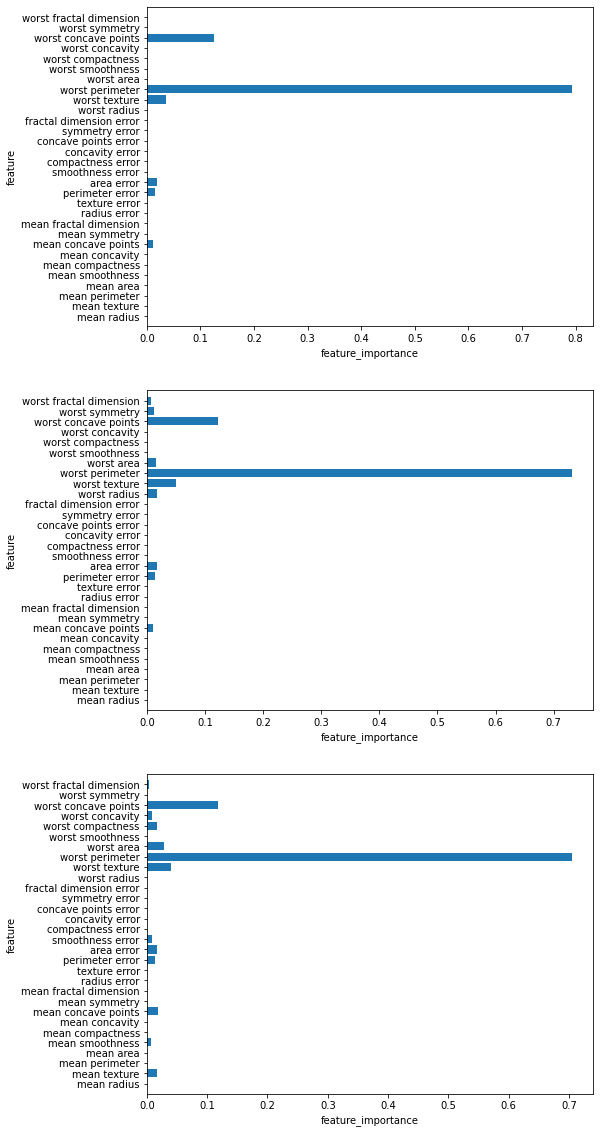

In [105]:
# fea_num = cancer.data.shape[1]
# # 모델, 피처의 개수
plt.figure(figsize = (8,20))
depth_num = [3,5,7]   # 트리의 순서 임으로 정한 수  
for index, val in enumerate(depth_num):# index 0번 과3 , index 1번 과5, index 2번과7
  X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y,
                                                    stratify = cancer.target,
                                                    test_size =30, # test 데이터 셋을 30%, train 데이터를 70% 사용하겠다는 말
                                                    random_state=77)
  model = DecisionTreeClassifier(max_depth = val, random_state=0)   # 의사결정 트리는 맨 위부터 0,1,2,3,4 순으로 카운트 함 
  model.fit(X_train, y_train)
  plt.subplot(3,1,index+1) # (내가 그릴 그래프 수(3번 정도가 적당!), 그래프의 가로 개수 (행), 그래프의 세롯 수(열)) 
  plot_feature_imp(model)



# #### output 해석

# 가 제일 상위에 있는 친구

실습1

In [26]:
X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y,
                                                    stratify = cancer.target,
                                                    test_size = 0.2,
                                                    random_state=77)

In [27]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)   # 의사결정 트리는 0,1,2,3,4 순으로 카운트 함 

tree.fit(X_train, y_train)

## max_depth의 숫자를 바꿔가며 정확도를 파악 
print("학습용 세트 정확도 : ", tree.score(X_train, y_train))
print("테스트 세트 정확도 : ", tree.score(X_test, y_test))

학습용 세트 정확도 :  0.9802197802197802
테스트 세트 정확도 :  0.8947368421052632


In [28]:
X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y,
                                                    stratify = cancer.target,
                                                    test_size = 0.1,
                                                    random_state=77)

In [29]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)   # 의사결정 트리는 0,1,2,3,4 순으로 카운트 함 

tree.fit(X_train, y_train)

## max_depth의 숫자를 바꿔가며 정확도를 파악 
print("학습용 세트 정확도 : ", tree.score(X_train, y_train))
print("테스트 세트 정확도 : ", tree.score(X_test, y_test))

학습용 세트 정확도 :  0.98828125
테스트 세트 정확도 :  0.8771929824561403


In [ ]:
.